In [12]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "" 

In [17]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_Y=data['fac'][:,2]
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
HIDDEN_SIZE = 10
BATCH_SIZE = 128   
NUM_EPOCHS = 1000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [18]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65, 1) (1000, 65, 1) (2000,) (1000,)


In [19]:
model = Sequential()
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=False,activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('tanh'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 65, 10)            480       
_________________________________________________________________
batch_normalization_5 (Batch (None, 65, 10)            40        
_________________________________________________________________
lstm_7 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_6 (Batch (None, 65, 10)            40        
_________________________________________________________________
lstm_8 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_7 (Batch (None, 65, 10)            40        
_________________________________________________________________
lstm_9 (LSTM)                (None, 65, 10)           

In [20]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
model.save('lstm_bn_5000_2.h5')
 

Epoch 1/1000
16/16 [==============================] - 10s 213ms/step - loss: 0.5836 - mean_squared_error: 0.5836 - val_loss: 9.7188e-05 - val_mean_squared_error: 9.7188e-05
Epoch 2/1000
16/16 [==============================] - 3s 157ms/step - loss: 0.1945 - mean_squared_error: 0.1945 - val_loss: 7.4527e-05 - val_mean_squared_error: 7.4527e-05
Epoch 3/1000
16/16 [==============================] - 3s 160ms/step - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 1.9625e-04 - val_mean_squared_error: 1.9625e-04
Epoch 4/1000
16/16 [==============================] - 3s 164ms/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 7.7593e-05 - val_mean_squared_error: 7.7593e-05
Epoch 5/1000
16/16 [==============================] - 3s 159ms/step - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 8.4038e-05 - val_mean_squared_error: 8.4038e-05
Epoch 6/1000
16/16 [==============================] - 3s 159ms/step - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0056 - val_me

16/16 [==============================] - 2s 120ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 51/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 52/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 53/1000
16/16 [==============================] - 2s 120ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 54/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 55/1000
16/16 [==============================] - 2s 117ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 56/1000
16/16 [===

Epoch 99/1000
16/16 [==============================] - 2s 120ms/step - loss: 4.5865e-04 - mean_squared_error: 4.5865e-04 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 100/1000
16/16 [==============================] - 2s 117ms/step - loss: 6.2670e-04 - mean_squared_error: 6.2670e-04 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 101/1000
16/16 [==============================] - 2s 117ms/step - loss: 4.4210e-04 - mean_squared_error: 4.4210e-04 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 102/1000
16/16 [==============================] - 2s 121ms/step - loss: 3.4284e-04 - mean_squared_error: 3.4284e-04 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 103/1000
16/16 [==============================] - 2s 118ms/step - loss: 4.0557e-04 - mean_squared_error: 4.0557e-04 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 104/1000
16/16 [==============================] - 2s 119ms/step - loss: 4.8985e-04 - mean_squared_error: 4.8985e-04 - val_los

16/16 [==============================] - 2s 120ms/step - loss: 2.2466e-04 - mean_squared_error: 2.2466e-04 - val_loss: 3.5559e-04 - val_mean_squared_error: 3.5559e-04
Epoch 146/1000
16/16 [==============================] - 2s 124ms/step - loss: 2.0893e-04 - mean_squared_error: 2.0893e-04 - val_loss: 5.2682e-04 - val_mean_squared_error: 5.2682e-04
Epoch 147/1000
16/16 [==============================] - 2s 125ms/step - loss: 2.5507e-04 - mean_squared_error: 2.5507e-04 - val_loss: 3.2837e-04 - val_mean_squared_error: 3.2837e-04
Epoch 148/1000
16/16 [==============================] - 2s 119ms/step - loss: 2.1064e-04 - mean_squared_error: 2.1064e-04 - val_loss: 8.3335e-04 - val_mean_squared_error: 8.3335e-04
Epoch 149/1000
16/16 [==============================] - 2s 119ms/step - loss: 2.7035e-04 - mean_squared_error: 2.7035e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 150/1000
16/16 [==============================] - 2s 116ms/step - loss: 2.1951e-04 - mean_squared_error: 2.

16/16 [==============================] - 2s 117ms/step - loss: 1.4687e-04 - mean_squared_error: 1.4687e-04 - val_loss: 4.2471e-04 - val_mean_squared_error: 4.2471e-04
Epoch 191/1000
16/16 [==============================] - 2s 122ms/step - loss: 1.4687e-04 - mean_squared_error: 1.4687e-04 - val_loss: 3.5979e-04 - val_mean_squared_error: 3.5979e-04
Epoch 192/1000
16/16 [==============================] - 2s 117ms/step - loss: 1.2509e-04 - mean_squared_error: 1.2509e-04 - val_loss: 3.2862e-04 - val_mean_squared_error: 3.2862e-04
Epoch 193/1000
16/16 [==============================] - 2s 118ms/step - loss: 1.2212e-04 - mean_squared_error: 1.2212e-04 - val_loss: 1.7174e-04 - val_mean_squared_error: 1.7174e-04
Epoch 194/1000
16/16 [==============================] - 2s 116ms/step - loss: 1.1721e-04 - mean_squared_error: 1.1721e-04 - val_loss: 3.2256e-04 - val_mean_squared_error: 3.2256e-04
Epoch 195/1000
16/16 [==============================] - 2s 119ms/step - loss: 1.3838e-04 - mean_squared_e

16/16 [==============================] - 2s 118ms/step - loss: 1.0622e-04 - mean_squared_error: 1.0622e-04 - val_loss: 2.6961e-04 - val_mean_squared_error: 2.6961e-04
Epoch 236/1000
16/16 [==============================] - 2s 119ms/step - loss: 9.4044e-05 - mean_squared_error: 9.4044e-05 - val_loss: 2.4031e-04 - val_mean_squared_error: 2.4031e-04
Epoch 237/1000
16/16 [==============================] - 2s 115ms/step - loss: 1.0801e-04 - mean_squared_error: 1.0801e-04 - val_loss: 1.9249e-04 - val_mean_squared_error: 1.9249e-04
Epoch 238/1000
16/16 [==============================] - 2s 119ms/step - loss: 8.3872e-05 - mean_squared_error: 8.3872e-05 - val_loss: 4.0079e-04 - val_mean_squared_error: 4.0079e-04
Epoch 239/1000
16/16 [==============================] - 2s 122ms/step - loss: 8.1777e-05 - mean_squared_error: 8.1777e-05 - val_loss: 1.9766e-04 - val_mean_squared_error: 1.9766e-04
Epoch 240/1000
16/16 [==============================] - 2s 117ms/step - loss: 8.7673e-05 - mean_squared_e

16/16 [==============================] - 2s 120ms/step - loss: 7.6311e-05 - mean_squared_error: 7.6311e-05 - val_loss: 2.3133e-04 - val_mean_squared_error: 2.3133e-04
Epoch 281/1000
16/16 [==============================] - 2s 117ms/step - loss: 8.3111e-05 - mean_squared_error: 8.3111e-05 - val_loss: 9.4825e-05 - val_mean_squared_error: 9.4825e-05
Epoch 282/1000
16/16 [==============================] - 2s 118ms/step - loss: 8.3884e-05 - mean_squared_error: 8.3884e-05 - val_loss: 4.6602e-04 - val_mean_squared_error: 4.6602e-04
Epoch 283/1000
16/16 [==============================] - 2s 116ms/step - loss: 7.7918e-05 - mean_squared_error: 7.7918e-05 - val_loss: 1.6497e-04 - val_mean_squared_error: 1.6497e-04
Epoch 284/1000
16/16 [==============================] - 2s 116ms/step - loss: 7.3571e-05 - mean_squared_error: 7.3571e-05 - val_loss: 5.7010e-04 - val_mean_squared_error: 5.7010e-04
Epoch 285/1000
16/16 [==============================] - 2s 120ms/step - loss: 8.8885e-05 - mean_squared_e

16/16 [==============================] - 2s 118ms/step - loss: 6.4282e-05 - mean_squared_error: 6.4282e-05 - val_loss: 6.8052e-05 - val_mean_squared_error: 6.8052e-05
Epoch 326/1000
16/16 [==============================] - 2s 118ms/step - loss: 6.8383e-05 - mean_squared_error: 6.8383e-05 - val_loss: 2.5388e-04 - val_mean_squared_error: 2.5388e-04
Epoch 327/1000
16/16 [==============================] - 2s 119ms/step - loss: 7.2944e-05 - mean_squared_error: 7.2944e-05 - val_loss: 8.5257e-05 - val_mean_squared_error: 8.5257e-05
Epoch 328/1000
16/16 [==============================] - 2s 118ms/step - loss: 7.1033e-05 - mean_squared_error: 7.1033e-05 - val_loss: 1.7869e-04 - val_mean_squared_error: 1.7869e-04
Epoch 329/1000
16/16 [==============================] - 2s 118ms/step - loss: 7.0585e-05 - mean_squared_error: 7.0585e-05 - val_loss: 8.2797e-05 - val_mean_squared_error: 8.2797e-05
Epoch 330/1000
16/16 [==============================] - 2s 119ms/step - loss: 6.8992e-05 - mean_squared_e

16/16 [==============================] - 2s 118ms/step - loss: 6.9496e-05 - mean_squared_error: 6.9496e-05 - val_loss: 7.2274e-05 - val_mean_squared_error: 7.2274e-05
Epoch 371/1000
16/16 [==============================] - 2s 122ms/step - loss: 6.0883e-05 - mean_squared_error: 6.0883e-05 - val_loss: 2.1293e-04 - val_mean_squared_error: 2.1293e-04
Epoch 372/1000
16/16 [==============================] - 2s 119ms/step - loss: 6.8119e-05 - mean_squared_error: 6.8119e-05 - val_loss: 1.9843e-04 - val_mean_squared_error: 1.9843e-04
Epoch 373/1000
16/16 [==============================] - 2s 116ms/step - loss: 6.7997e-05 - mean_squared_error: 6.7997e-05 - val_loss: 5.9733e-05 - val_mean_squared_error: 5.9733e-05
Epoch 374/1000
16/16 [==============================] - 2s 117ms/step - loss: 7.0734e-05 - mean_squared_error: 7.0734e-05 - val_loss: 6.5529e-05 - val_mean_squared_error: 6.5529e-05
Epoch 375/1000
16/16 [==============================] - 2s 116ms/step - loss: 6.6332e-05 - mean_squared_e

16/16 [==============================] - 2s 119ms/step - loss: 6.4457e-05 - mean_squared_error: 6.4457e-05 - val_loss: 1.0334e-04 - val_mean_squared_error: 1.0334e-04
Epoch 416/1000
16/16 [==============================] - 2s 123ms/step - loss: 5.9470e-05 - mean_squared_error: 5.9470e-05 - val_loss: 9.6034e-05 - val_mean_squared_error: 9.6034e-05
Epoch 417/1000
16/16 [==============================] - 2s 116ms/step - loss: 6.2850e-05 - mean_squared_error: 6.2850e-05 - val_loss: 9.2504e-05 - val_mean_squared_error: 9.2504e-05
Epoch 418/1000
16/16 [==============================] - 2s 119ms/step - loss: 6.0983e-05 - mean_squared_error: 6.0983e-05 - val_loss: 4.9273e-05 - val_mean_squared_error: 4.9273e-05
Epoch 419/1000
16/16 [==============================] - 2s 116ms/step - loss: 6.0009e-05 - mean_squared_error: 6.0009e-05 - val_loss: 1.0644e-04 - val_mean_squared_error: 1.0644e-04
Epoch 420/1000
16/16 [==============================] - 2s 120ms/step - loss: 6.2987e-05 - mean_squared_e

16/16 [==============================] - 2s 123ms/step - loss: 5.3403e-05 - mean_squared_error: 5.3403e-05 - val_loss: 8.9000e-05 - val_mean_squared_error: 8.9000e-05
Epoch 461/1000
16/16 [==============================] - 2s 116ms/step - loss: 5.1343e-05 - mean_squared_error: 5.1343e-05 - val_loss: 1.0039e-04 - val_mean_squared_error: 1.0039e-04
Epoch 462/1000
16/16 [==============================] - 2s 118ms/step - loss: 5.5598e-05 - mean_squared_error: 5.5598e-05 - val_loss: 1.3891e-04 - val_mean_squared_error: 1.3891e-04
Epoch 463/1000
16/16 [==============================] - 2s 118ms/step - loss: 5.3345e-05 - mean_squared_error: 5.3345e-05 - val_loss: 7.0464e-05 - val_mean_squared_error: 7.0464e-05
Epoch 464/1000
16/16 [==============================] - 2s 116ms/step - loss: 5.4462e-05 - mean_squared_error: 5.4462e-05 - val_loss: 4.8042e-05 - val_mean_squared_error: 4.8042e-05
Epoch 465/1000
16/16 [==============================] - 2s 119ms/step - loss: 5.5546e-05 - mean_squared_e

16/16 [==============================] - 2s 119ms/step - loss: 6.2152e-05 - mean_squared_error: 6.2152e-05 - val_loss: 8.6084e-05 - val_mean_squared_error: 8.6084e-05
Epoch 506/1000
16/16 [==============================] - 2s 119ms/step - loss: 5.6552e-05 - mean_squared_error: 5.6552e-05 - val_loss: 8.3402e-05 - val_mean_squared_error: 8.3402e-05
Epoch 507/1000
16/16 [==============================] - 2s 116ms/step - loss: 6.0925e-05 - mean_squared_error: 6.0925e-05 - val_loss: 1.3338e-04 - val_mean_squared_error: 1.3338e-04
Epoch 508/1000
16/16 [==============================] - 2s 119ms/step - loss: 5.4916e-05 - mean_squared_error: 5.4916e-05 - val_loss: 6.1954e-05 - val_mean_squared_error: 6.1954e-05
Epoch 509/1000
16/16 [==============================] - 2s 118ms/step - loss: 5.1991e-05 - mean_squared_error: 5.1991e-05 - val_loss: 5.0937e-05 - val_mean_squared_error: 5.0937e-05
Epoch 510/1000
16/16 [==============================] - 2s 116ms/step - loss: 6.3481e-05 - mean_squared_e

16/16 [==============================] - 2s 113ms/step - loss: 5.1665e-05 - mean_squared_error: 5.1665e-05 - val_loss: 1.9389e-04 - val_mean_squared_error: 1.9389e-04
Epoch 551/1000
16/16 [==============================] - 2s 115ms/step - loss: 5.5485e-05 - mean_squared_error: 5.5485e-05 - val_loss: 7.5860e-05 - val_mean_squared_error: 7.5860e-05
Epoch 552/1000
16/16 [==============================] - 2s 116ms/step - loss: 5.5922e-05 - mean_squared_error: 5.5922e-05 - val_loss: 1.7028e-04 - val_mean_squared_error: 1.7028e-04
Epoch 553/1000
16/16 [==============================] - 2s 112ms/step - loss: 5.3585e-05 - mean_squared_error: 5.3585e-05 - val_loss: 5.5023e-05 - val_mean_squared_error: 5.5023e-05
Epoch 554/1000
16/16 [==============================] - 2s 113ms/step - loss: 4.9441e-05 - mean_squared_error: 4.9441e-05 - val_loss: 6.7627e-05 - val_mean_squared_error: 6.7627e-05
Epoch 555/1000
16/16 [==============================] - 2s 114ms/step - loss: 5.2653e-05 - mean_squared_e

16/16 [==============================] - 2s 114ms/step - loss: 5.9209e-05 - mean_squared_error: 5.9209e-05 - val_loss: 1.4268e-04 - val_mean_squared_error: 1.4268e-04
Epoch 596/1000
16/16 [==============================] - 2s 116ms/step - loss: 5.0165e-05 - mean_squared_error: 5.0165e-05 - val_loss: 3.0115e-04 - val_mean_squared_error: 3.0115e-04
Epoch 597/1000
16/16 [==============================] - 2s 115ms/step - loss: 4.7286e-05 - mean_squared_error: 4.7286e-05 - val_loss: 2.3631e-04 - val_mean_squared_error: 2.3631e-04
Epoch 598/1000
16/16 [==============================] - 2s 114ms/step - loss: 4.9671e-05 - mean_squared_error: 4.9671e-05 - val_loss: 1.2621e-04 - val_mean_squared_error: 1.2621e-04
Epoch 599/1000
16/16 [==============================] - 2s 119ms/step - loss: 4.7228e-05 - mean_squared_error: 4.7228e-05 - val_loss: 5.8149e-05 - val_mean_squared_error: 5.8149e-05
Epoch 600/1000
16/16 [==============================] - 2s 115ms/step - loss: 4.8057e-05 - mean_squared_e

16/16 [==============================] - 2s 115ms/step - loss: 4.7152e-05 - mean_squared_error: 4.7152e-05 - val_loss: 3.6350e-04 - val_mean_squared_error: 3.6350e-04
Epoch 641/1000
16/16 [==============================] - 2s 116ms/step - loss: 4.8516e-05 - mean_squared_error: 4.8516e-05 - val_loss: 3.6755e-04 - val_mean_squared_error: 3.6755e-04
Epoch 642/1000
16/16 [==============================] - 2s 117ms/step - loss: 4.9466e-05 - mean_squared_error: 4.9466e-05 - val_loss: 2.1928e-04 - val_mean_squared_error: 2.1928e-04
Epoch 643/1000
16/16 [==============================] - 2s 121ms/step - loss: 4.4290e-05 - mean_squared_error: 4.4290e-05 - val_loss: 1.5596e-04 - val_mean_squared_error: 1.5596e-04
Epoch 644/1000
16/16 [==============================] - 2s 116ms/step - loss: 4.4925e-05 - mean_squared_error: 4.4925e-05 - val_loss: 1.3040e-04 - val_mean_squared_error: 1.3040e-04
Epoch 645/1000
16/16 [==============================] - 2s 119ms/step - loss: 5.3012e-05 - mean_squared_e

16/16 [==============================] - 2s 114ms/step - loss: 4.5843e-05 - mean_squared_error: 4.5843e-05 - val_loss: 3.2152e-04 - val_mean_squared_error: 3.2152e-04
Epoch 686/1000
16/16 [==============================] - 2s 114ms/step - loss: 4.5480e-05 - mean_squared_error: 4.5480e-05 - val_loss: 2.9785e-04 - val_mean_squared_error: 2.9785e-04
Epoch 687/1000
16/16 [==============================] - 2s 114ms/step - loss: 4.4407e-05 - mean_squared_error: 4.4407e-05 - val_loss: 2.0142e-04 - val_mean_squared_error: 2.0142e-04
Epoch 688/1000
16/16 [==============================] - 2s 113ms/step - loss: 4.0503e-05 - mean_squared_error: 4.0503e-05 - val_loss: 3.0010e-04 - val_mean_squared_error: 3.0010e-04
Epoch 689/1000
16/16 [==============================] - 2s 118ms/step - loss: 3.7753e-05 - mean_squared_error: 3.7753e-05 - val_loss: 3.0297e-04 - val_mean_squared_error: 3.0297e-04
Epoch 690/1000
16/16 [==============================] - 2s 119ms/step - loss: 3.8267e-05 - mean_squared_e

16/16 [==============================] - 2s 116ms/step - loss: 4.3526e-05 - mean_squared_error: 4.3526e-05 - val_loss: 4.2892e-05 - val_mean_squared_error: 4.2892e-05
Epoch 731/1000
16/16 [==============================] - 2s 120ms/step - loss: 3.7712e-05 - mean_squared_error: 3.7712e-05 - val_loss: 2.7555e-04 - val_mean_squared_error: 2.7555e-04
Epoch 732/1000
16/16 [==============================] - 2s 113ms/step - loss: 3.8527e-05 - mean_squared_error: 3.8527e-05 - val_loss: 2.2334e-04 - val_mean_squared_error: 2.2334e-04
Epoch 733/1000
16/16 [==============================] - 2s 120ms/step - loss: 3.5790e-05 - mean_squared_error: 3.5790e-05 - val_loss: 1.5699e-04 - val_mean_squared_error: 1.5699e-04
Epoch 734/1000
16/16 [==============================] - 2s 113ms/step - loss: 3.3726e-05 - mean_squared_error: 3.3726e-05 - val_loss: 3.1994e-04 - val_mean_squared_error: 3.1994e-04
Epoch 735/1000
16/16 [==============================] - 2s 116ms/step - loss: 3.3579e-05 - mean_squared_e

16/16 [==============================] - 2s 114ms/step - loss: 2.6375e-05 - mean_squared_error: 2.6375e-05 - val_loss: 1.2137e-04 - val_mean_squared_error: 1.2137e-04
Epoch 776/1000
16/16 [==============================] - 2s 113ms/step - loss: 2.8772e-05 - mean_squared_error: 2.8772e-05 - val_loss: 2.4101e-04 - val_mean_squared_error: 2.4101e-04
Epoch 777/1000
16/16 [==============================] - 2s 115ms/step - loss: 2.8778e-05 - mean_squared_error: 2.8778e-05 - val_loss: 1.0171e-04 - val_mean_squared_error: 1.0171e-04
Epoch 778/1000
16/16 [==============================] - 2s 115ms/step - loss: 2.7187e-05 - mean_squared_error: 2.7187e-05 - val_loss: 1.8850e-04 - val_mean_squared_error: 1.8850e-04
Epoch 779/1000
16/16 [==============================] - 2s 115ms/step - loss: 3.5672e-05 - mean_squared_error: 3.5672e-05 - val_loss: 1.1894e-04 - val_mean_squared_error: 1.1894e-04
Epoch 780/1000
16/16 [==============================] - 2s 114ms/step - loss: 3.0238e-05 - mean_squared_e

16/16 [==============================] - 2s 127ms/step - loss: 2.3253e-05 - mean_squared_error: 2.3253e-05 - val_loss: 1.4977e-04 - val_mean_squared_error: 1.4977e-04
Epoch 821/1000
16/16 [==============================] - 2s 128ms/step - loss: 2.3897e-05 - mean_squared_error: 2.3897e-05 - val_loss: 3.1237e-04 - val_mean_squared_error: 3.1237e-04
Epoch 822/1000
16/16 [==============================] - 2s 119ms/step - loss: 2.3823e-05 - mean_squared_error: 2.3823e-05 - val_loss: 9.0246e-05 - val_mean_squared_error: 9.0246e-05
Epoch 823/1000
16/16 [==============================] - 2s 119ms/step - loss: 2.1857e-05 - mean_squared_error: 2.1857e-05 - val_loss: 1.6630e-04 - val_mean_squared_error: 1.6630e-04
Epoch 824/1000
16/16 [==============================] - 2s 120ms/step - loss: 2.4366e-05 - mean_squared_error: 2.4366e-05 - val_loss: 1.7209e-04 - val_mean_squared_error: 1.7209e-04
Epoch 825/1000
16/16 [==============================] - 2s 118ms/step - loss: 2.4192e-05 - mean_squared_e

16/16 [==============================] - 2s 117ms/step - loss: 1.6122e-05 - mean_squared_error: 1.6122e-05 - val_loss: 1.1819e-04 - val_mean_squared_error: 1.1819e-04
Epoch 866/1000
16/16 [==============================] - 2s 118ms/step - loss: 1.8582e-05 - mean_squared_error: 1.8582e-05 - val_loss: 7.1416e-05 - val_mean_squared_error: 7.1416e-05
Epoch 867/1000
16/16 [==============================] - 2s 118ms/step - loss: 2.0530e-05 - mean_squared_error: 2.0530e-05 - val_loss: 4.4629e-05 - val_mean_squared_error: 4.4629e-05
Epoch 868/1000
16/16 [==============================] - 2s 116ms/step - loss: 2.1077e-05 - mean_squared_error: 2.1077e-05 - val_loss: 6.5073e-04 - val_mean_squared_error: 6.5073e-04
Epoch 869/1000
16/16 [==============================] - 2s 120ms/step - loss: 1.6493e-05 - mean_squared_error: 1.6493e-05 - val_loss: 4.0894e-05 - val_mean_squared_error: 4.0894e-05
Epoch 870/1000
16/16 [==============================] - 2s 119ms/step - loss: 1.8904e-05 - mean_squared_e

16/16 [==============================] - 2s 116ms/step - loss: 1.5025e-05 - mean_squared_error: 1.5025e-05 - val_loss: 3.1583e-05 - val_mean_squared_error: 3.1583e-05
Epoch 911/1000
16/16 [==============================] - 2s 119ms/step - loss: 1.4376e-05 - mean_squared_error: 1.4376e-05 - val_loss: 1.2196e-04 - val_mean_squared_error: 1.2196e-04
Epoch 912/1000
16/16 [==============================] - 2s 119ms/step - loss: 1.7240e-05 - mean_squared_error: 1.7240e-05 - val_loss: 2.8098e-04 - val_mean_squared_error: 2.8098e-04
Epoch 913/1000
16/16 [==============================] - 2s 117ms/step - loss: 1.8496e-05 - mean_squared_error: 1.8496e-05 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 914/1000
16/16 [==============================] - 2s 119ms/step - loss: 1.7232e-05 - mean_squared_error: 1.7232e-05 - val_loss: 5.6353e-05 - val_mean_squared_error: 5.6353e-05
Epoch 915/1000
16/16 [==============================] - 2s 118ms/step - loss: 1.5498e-05 - mean_squared_error: 1.

16/16 [==============================] - 2s 117ms/step - loss: 1.4893e-05 - mean_squared_error: 1.4893e-05 - val_loss: 1.0004e-04 - val_mean_squared_error: 1.0004e-04
Epoch 956/1000
16/16 [==============================] - 2s 119ms/step - loss: 1.4361e-05 - mean_squared_error: 1.4361e-05 - val_loss: 1.6360e-04 - val_mean_squared_error: 1.6360e-04
Epoch 957/1000
16/16 [==============================] - 2s 118ms/step - loss: 1.5183e-05 - mean_squared_error: 1.5183e-05 - val_loss: 6.3183e-05 - val_mean_squared_error: 6.3183e-05
Epoch 958/1000
16/16 [==============================] - 2s 119ms/step - loss: 1.5456e-05 - mean_squared_error: 1.5456e-05 - val_loss: 1.6338e-04 - val_mean_squared_error: 1.6338e-04
Epoch 959/1000
16/16 [==============================] - 2s 116ms/step - loss: 1.3295e-05 - mean_squared_error: 1.3295e-05 - val_loss: 9.2144e-05 - val_mean_squared_error: 9.2144e-05
Epoch 960/1000
16/16 [==============================] - 2s 117ms/step - loss: 1.5161e-05 - mean_squared_e

8/8 [==============================] - 0s 19ms/step - loss: 1.3791e-04 - mean_squared_error: 1.3791e-04


In [21]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.000, RMSE: 0.012
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


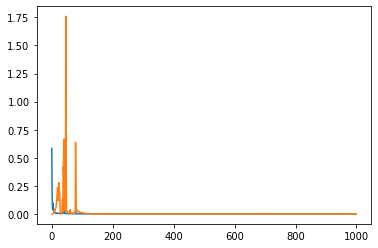

In [22]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

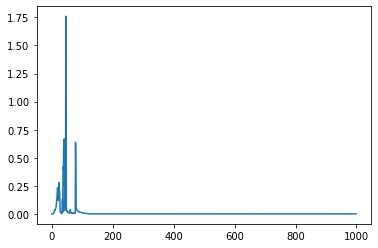

In [23]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [24]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[ 2.05285400e-02]
 [-3.33626289e-04]
 [ 2.80467477e-02]
 [ 1.17345005e-02]
 [ 1.01497862e-02]
 [ 1.09509355e-03]
 [ 1.74586996e-02]
 [ 3.86770740e-02]
 [ 2.87190545e-02]
 [ 2.42375098e-02]
 [ 7.02245254e-03]
 [ 3.31437401e-02]
 [ 1.84441432e-02]
 [ 4.09821868e-02]
 [ 4.97640343e-04]
 [ 2.34382953e-02]
 [ 5.25327260e-03]
 [ 3.54273580e-02]
 [-3.46765528e-03]
 [ 1.12648346e-02]
 [ 3.34904268e-02]
 [ 2.48057581e-02]
 [ 4.55304943e-02]
 [ 1.23683945e-03]
 [ 2.35559605e-02]
 [ 1.12366285e-02]
 [ 3.72060426e-02]
 [ 1.09838787e-04]
 [ 2.28915047e-02]
 [-8.80666543e-04]
 [ 2.61943378e-02]
 [ 4.09389921e-02]
 [ 6.60311757e-03]
 [ 3.00579667e-02]
 [ 1.44291669e-02]
 [ 3.92266810e-02]
 [-3.57784471e-03]
 [ 2.53253803e-02]
 [ 2.00552586e-03]
 [ 3.08669042e-02]
 [ 1.55885797e-02]
 [ 1.39136296e-02]
 [ 2.06121663e-03]
 [ 1.86691731e-02]
 [ 3.90630178e-02]
 [ 3.17352004e-02]
 [ 2.58988664e-02]
 [ 7.58583006e-03]
 [ 3.81663218e-02]
 [ 2.48281546e-02]
 [ 1.52963866e-02]
 [ 9.39157326e-04]
 [ 2.5732696

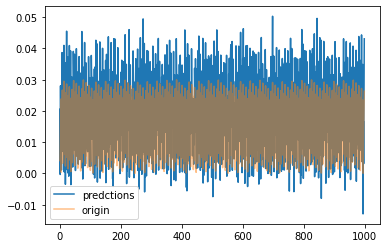

In [26]:
plt.figure()
plt.plot(pre,label='predctions',alpha=1)
plt.plot(Ytest,label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


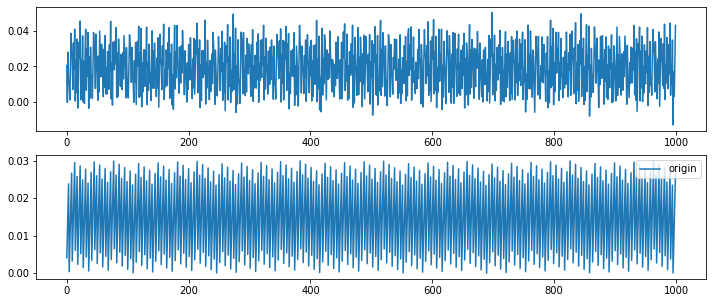

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

In [28]:
pre.shape

(1000, 1)

In [31]:
np.mean(np.maximum(pre-Ytest,Ytest-pre))

0.01355791102901602